##### Dataset

In [1]:
# banknotes.csv, petrol_consumption.csv, iris.csv, wine-class.csv
# https://mitu.co.in/dataset

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # visualisation library

##### Load the Data

In [5]:
df = pd.read_csv('datasets/banknotes.csv')

In [6]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [7]:
set(df['Class'])

{0, 1}

In [8]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


##### Separate the input and output data

In [9]:
# Input features
x = df[['Variance','Skewness','Curtosis','Entropy']]
# or x = df.drop('class'), axis = 1

# Output labels
y = df['Class']

In [10]:
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [11]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

##### Explore the Data

In [12]:
y.value_counts() # no missing are there 

Class
0    762
1    610
Name: count, dtype: int64

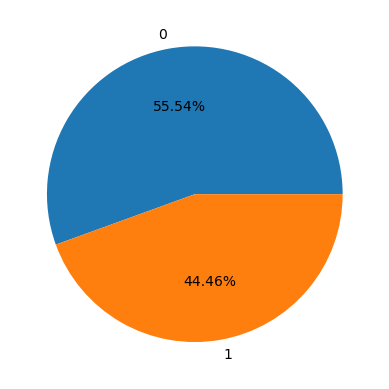

In [13]:
plt.pie(y.value_counts(), labels = y.value_counts().index, autopct='%2.2f%%');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


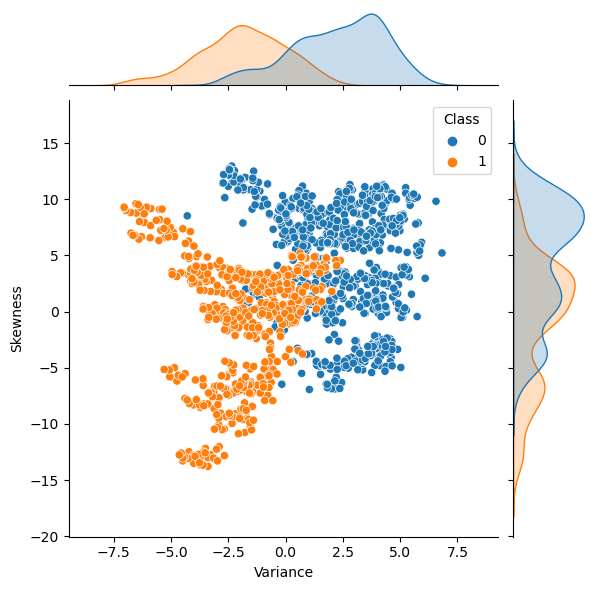

In [14]:
sns.jointplot(x = 'Variance', y = 'Skewness', data = df, hue = 'Class');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

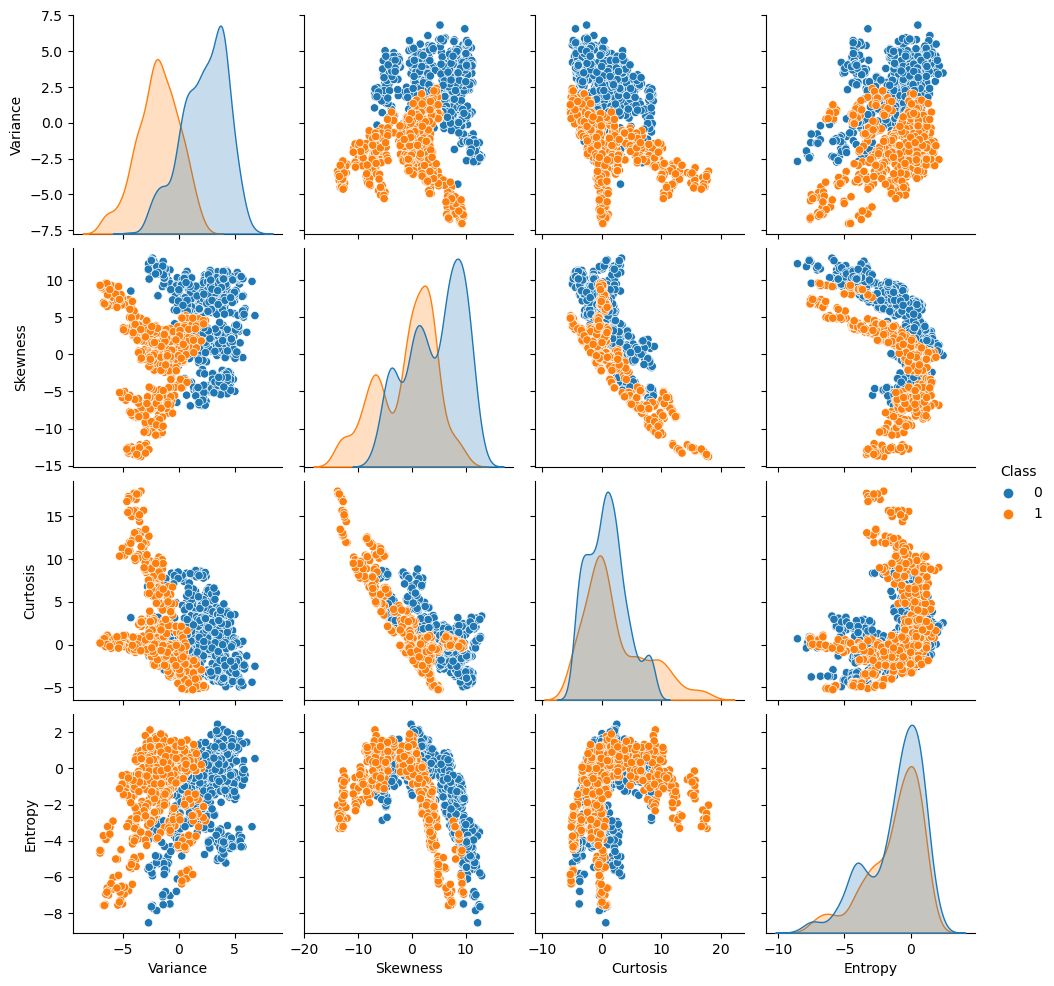

In [15]:
# n pair plot
sns.pairplot(df, hue = 'Class')

##### Cross Validation

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [18]:
x_train.shape

(1029, 4)

In [19]:
y_train.shape

(1029,)

In [20]:
x_test.shape

(343, 4)

In [21]:
y_train.shape

(1029,)

##### Build the model

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
clf_tree = DecisionTreeClassifier()

In [24]:
# train the algorithm
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier()

##### Performance Evaluation

In [25]:
y_pred = clf_tree.predict(x_test)

In [26]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [27]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})
result

,actual,predicted
1023,1,1
642,0,0
1196,1,1
31,0,0
253,0,0
...,...,...
866,1,1
361,0,0
703,0,0
328,0,0


##### Confusion Metric

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [29]:
print(confusion_matrix(y_test, y_pred))

[[194   1]
 [  3 145]]


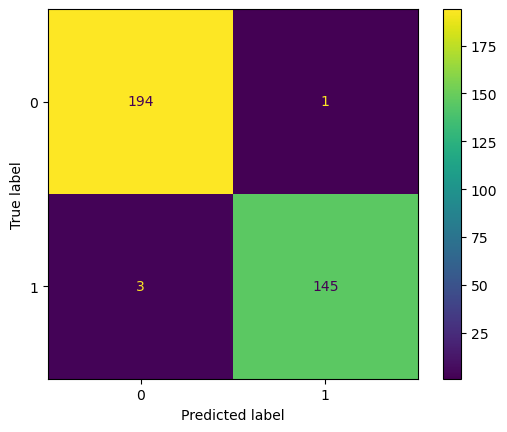

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [31]:
accuracy_score(y_test, y_pred)

0.9883381924198251

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       195
           1       0.99      0.98      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



##### Visualize the treee

In [33]:
from sklearn.tree import plot_tree

[Text(0.4991319444444444, 0.9444444444444444, 'x[0] <= 0.274\ngini = 0.495\nsamples = 1029\nvalue = [567, 462]'),
 Text(0.3298611111111111, 0.8333333333333334, 'x[1] <= 7.565\ngini = 0.298\nsamples = 495\nvalue = [90, 405]'),
 Text(0.22916666666666666, 0.7222222222222222, 'x[0] <= -0.471\ngini = 0.129\nsamples = 417\nvalue = [29, 388]'),
 Text(0.1111111111111111, 0.6111111111111112, 'x[2] <= 6.746\ngini = 0.061\nsamples = 349\nvalue = [11, 338]'),
 Text(0.05555555555555555, 0.5, 'x[1] <= 7.293\ngini = 0.008\nsamples = 249\nvalue = [1, 248]'),
 Text(0.027777777777777776, 0.3888888888888889, 'gini = 0.0\nsamples = 245\nvalue = [0, 245]'),
 Text(0.08333333333333333, 0.3888888888888889, 'x[1] <= 7.349\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.05555555555555555, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1111111111111111, 0.2777777777777778, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.16666666666666666, 0.5, 'x[1] <= -4.8\ngini = 0.18\nsample

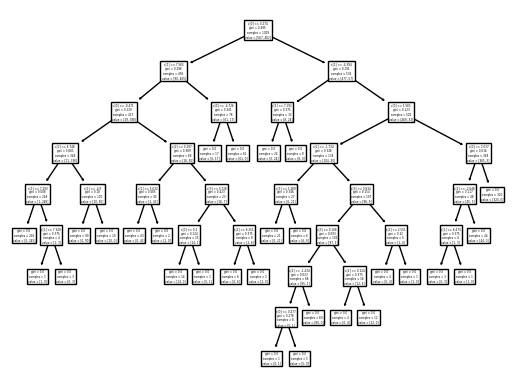

In [34]:
plot_tree(clf_tree)

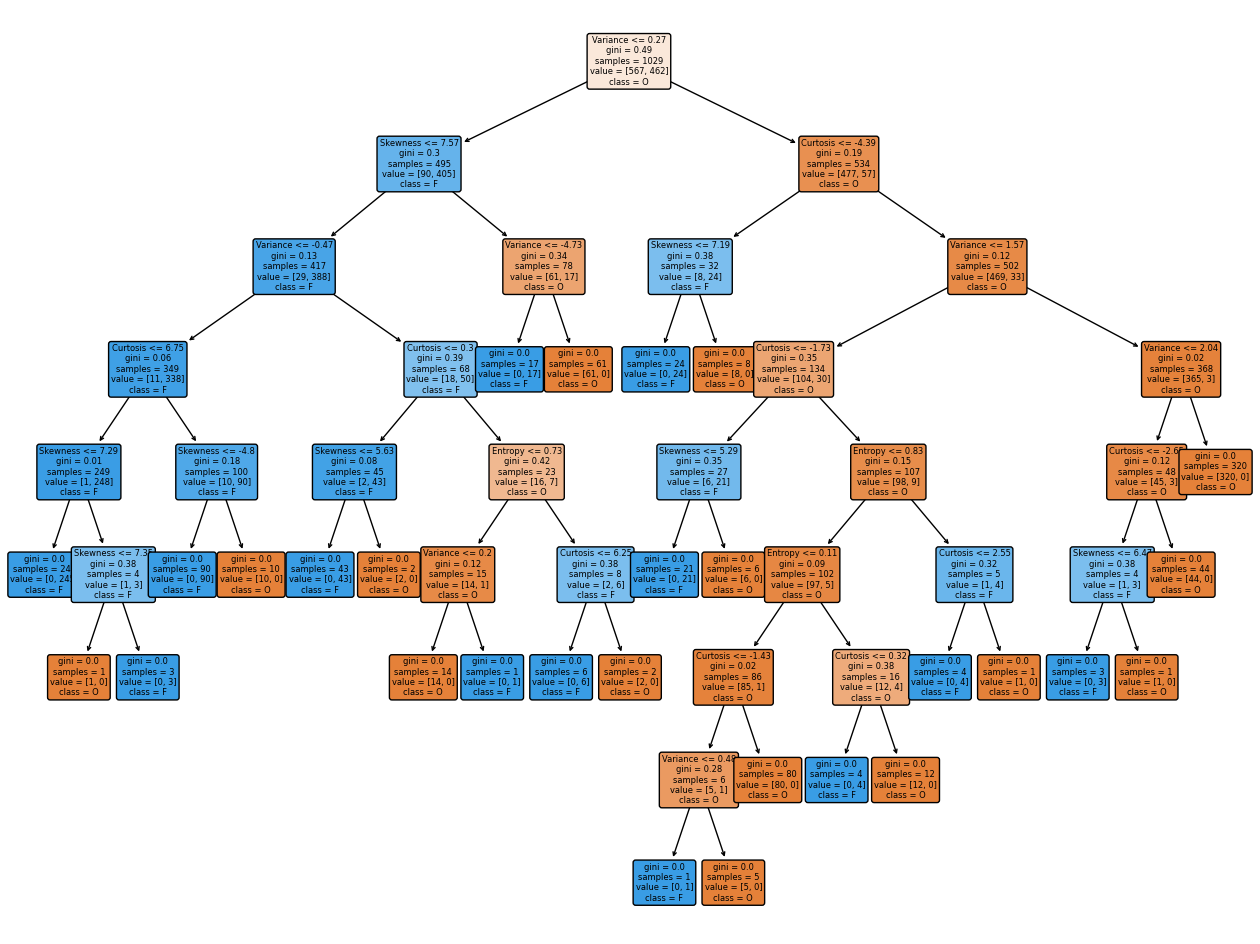

In [35]:
plt.figure(figsize=(16,12))
plot_tree(clf_tree, fontsize=6, feature_names=x.columns, filled = True, precision=2, class_names=['O','F'], rounded= True);
# to save the file in current working directory
plt.savefig('tree.png')

<BarContainer object of 4 artists>

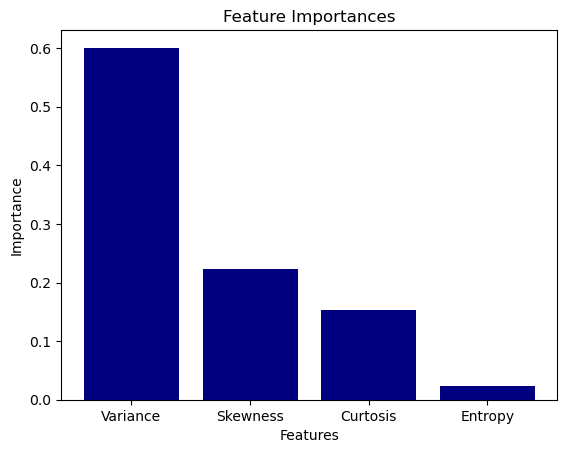

In [36]:
# Feature Importance bar
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(x.columns, clf_tree.feature_importances_, color = 'navy')

In [37]:
user_var = float(input('Enter Variance: '))
user_ske = float(input('Enter Skewness: '))
user_cur = float(input('Enter Curtosis: '))
user_ent = float(input('Enter Entropy: '))

data = np.array([[user_var, user_ske, user_cur, user_ent]])
pred = clf_tree.predict(data)
if pred[0] == 0:
    print('Original Note')
else:
    print('Fake Note')

Enter Variance:  2.2
Enter Skewness:  23.
Enter Curtosis:  .23
Enter Entropy:  .54


Original Note


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [38]:
# or using dataframe 
user_var = float(input('Enter Variance: '))
user_ske = float(input('Enter Skewness: '))
user_cur = float(input('Enter Curtosis: '))
user_ent = float(input('Enter Entropy: '))

data = pd.DataFrame(data = [[user_var, user_ske,user_cur, user_ent]], columns=x.columns)
pred = clf_tree.predict(data)
if pred[0] == 0:
    print('Original Note')
else:
    print('Fake Note')

Enter Variance:  .25
Enter Skewness:  25
Enter Curtosis:  .12
Enter Entropy:  .01


Original Note


In [39]:
new = pd.DataFrame(data = [[3.45660, 9.52280, -4.0112, -3.59440],
                           [0.40614, 1.34920, -1.4501, -0.55949],
                           [3.86600, -2.63830, 1.9242, 0.10645]], columns = x.columns)

In [40]:
new

,Variance,Skewness,Curtosis,Entropy
0,3.45660,9.5228,-4.0112,-3.59440
1,0.40614,1.3492,-1.4501,-0.55949
2,3.86600,-2.6383,1.9242,0.10645


In [41]:
clf_tree.predict(new)

array([0, 1, 0], dtype=int64)

In [3]:
%%time
clf_tree.fit(x_train, y_train)

NameError: name 'clf_tree' is not defined